In [171]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [172]:
train = pd.read_csv('/content/laptops_train.csv')
test = pd.read_csv('/content/laptops_test.csv')

In [173]:
train.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [174]:
data = pd.concat([train,test])

In [175]:
print(train.shape,test.shape,data.shape)

(977, 13) (325, 13) (1302, 13)


**Data Preprocessing**

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 324
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              1302 non-null   object 
 1   Model Name                1302 non-null   object 
 2   Category                  1302 non-null   object 
 3   Screen Size               1302 non-null   object 
 4   Screen                    1302 non-null   object 
 5   CPU                       1302 non-null   object 
 6   RAM                       1302 non-null   object 
 7    Storage                  1302 non-null   object 
 8   GPU                       1302 non-null   object 
 9   Operating System          1302 non-null   object 
 10  Operating System Version  1132 non-null   object 
 11  Weight                    1302 non-null   object 
 12  Price                     1302 non-null   float64
dtypes: float64(1), object(12)
memory usage: 142.4+ KB


In [177]:
data.describe()

,Price
count,1.302000e+03
mean,9.987213e+06
std,6.215746e+06
min,1.547208e+06
25%,5.326308e+06
50%,8.687484e+06
75%,1.321198e+07
max,5.423231e+07


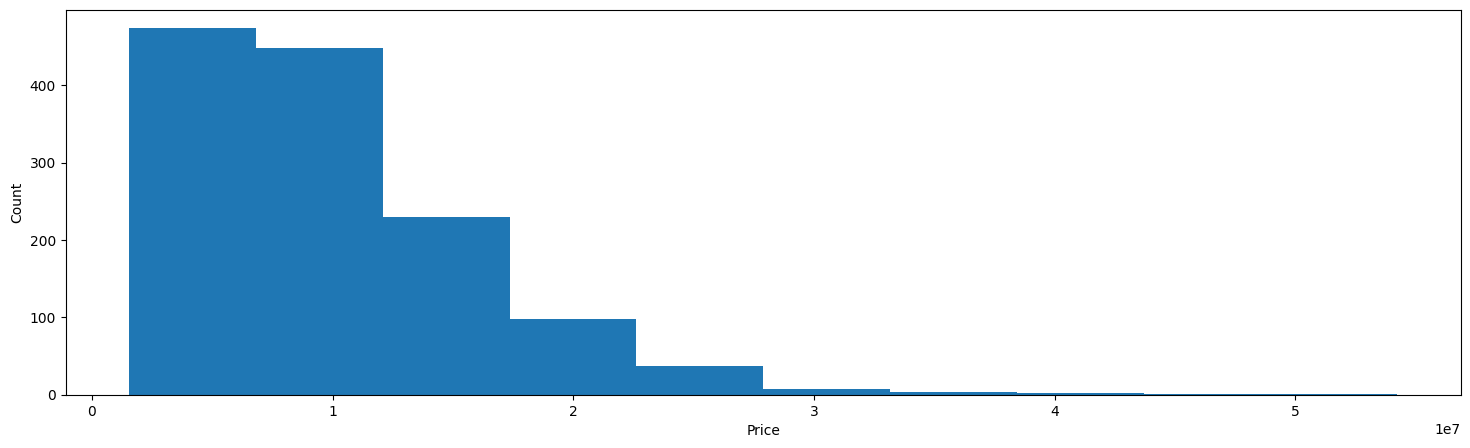

In [178]:
plt.figure(figsize=(18,5))
plt.hist(data["Price"])
plt.xlabel("Price")
plt.ylabel('Count')
plt.show()

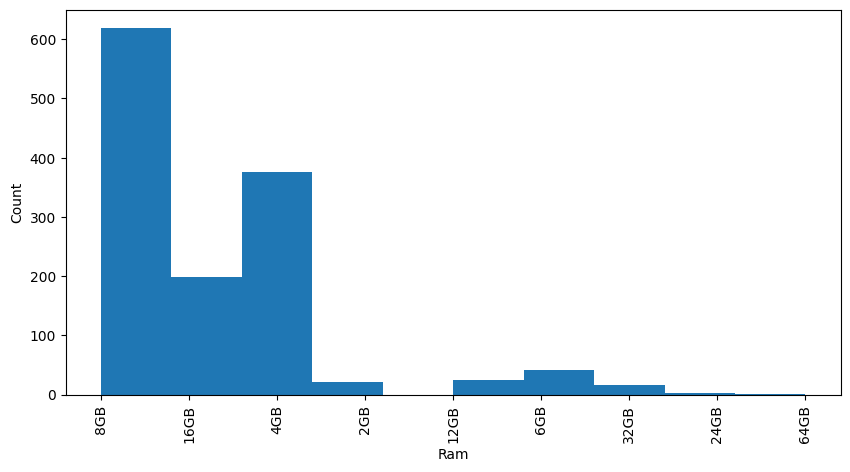

In [179]:
plt.figure(figsize=(10,5))
plt.hist(data["RAM"])
plt.xticks(rotation='vertical')
plt.xlabel("Ram")
plt.ylabel('Count')
# plt.yticks(rotation='vertical')
plt.show()

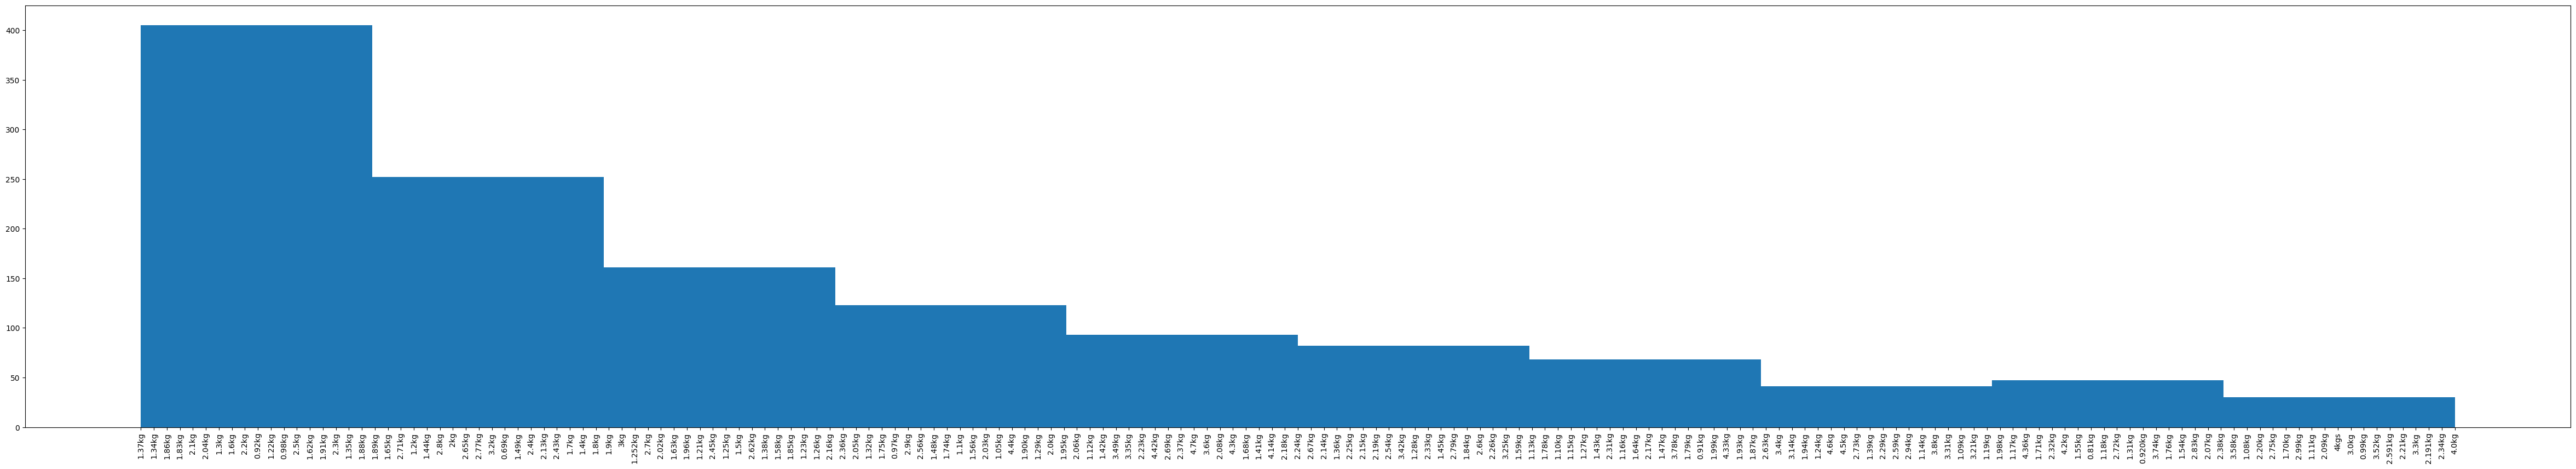

In [180]:
plt.figure(figsize=(60,10))
plt.hist(data["Weight"])
plt.xticks(rotation='vertical')
plt.show()

In [181]:
data.isnull().sum()

,0
Manufacturer,0
Model Name,0
Category,0
Screen Size,0
Screen,0
CPU,0
RAM,0
Storage,0
GPU,0
Operating System,0


In [182]:
data = data.drop('Operating System Version',axis=1)

In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 324
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      1302 non-null   object 
 1   Model Name        1302 non-null   object 
 2   Category          1302 non-null   object 
 3   Screen Size       1302 non-null   object 
 4   Screen            1302 non-null   object 
 5   CPU               1302 non-null   object 
 6   RAM               1302 non-null   object 
 7    Storage          1302 non-null   object 
 8   GPU               1302 non-null   object 
 9   Operating System  1302 non-null   object 
 10  Weight            1302 non-null   object 
 11  Price             1302 non-null   float64
dtypes: float64(1), object(11)
memory usage: 132.2+ KB


In [184]:
data = data.rename(columns={' Storage':'Storage'})

In [185]:
data['Wt'] = data['Weight'].apply(lambda x: x.split('k')[0])
data['R'] = data['RAM'].apply(lambda x: x.split('G')[0])
data['SS'] = data['Screen Size'].apply(lambda x: x.split('\"')[0])

In [186]:
data.head(20)

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Weight,Price,Wt,R,SS
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,11912523.48,1.37,8,13.3
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,7993374.48,1.34,8,13.3
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,5112900.00,1.86,8,15.6
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,22563005.40,1.83,16,15.4
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,16037611.20,1.37,8,13.3
5,Acer,Aspire 3,Notebook,"15.6""",1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows,2.1kg,3556800.00,2.1,4,15.6
6,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS,2.04kg,19028613.24,2.04,16,15.4
7,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,10303160.40,1.34,8,13.3
8,Asus,ZenBook UX430UN,Ultrabook,"14.0""",Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows,1.3kg,13293540.00,1.3,16,14.0
9,Acer,Swift 3,Ultrabook,"14.0""",IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows,1.6kg,6846840.00,1.6,8,14.0


In [187]:
data = data.drop(['Weight','Screen Size','RAM'],axis=1)
data = data.rename(columns={'SS':'Screen Size'})
data = data.rename(columns={'R':'RAM'})
data = data.rename(columns={'Wt':'Weight'})
data.head()

,Manufacturer,Model Name,Category,Screen,CPU,Storage,GPU,Operating System,Price,Weight,RAM,Screen Size
0,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,11912523.48,1.37,8,13.3
1,Apple,Macbook Air,Ultrabook,1440x900,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,7993374.48,1.34,8,13.3
2,HP,250 G6,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,5112900.00,1.86,8,15.6
3,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,22563005.40,1.83,16,15.4
4,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,16037611.20,1.37,8,13.3


In [188]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 324
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      1302 non-null   object 
 1   Model Name        1302 non-null   object 
 2   Category          1302 non-null   object 
 3   Screen            1302 non-null   object 
 4   CPU               1302 non-null   object 
 5   Storage           1302 non-null   object 
 6   GPU               1302 non-null   object 
 7   Operating System  1302 non-null   object 
 8   Price             1302 non-null   float64
 9   Weight            1302 non-null   object 
 10  RAM               1302 non-null   object 
 11  Screen Size       1302 non-null   object 
dtypes: float64(1), object(11)
memory usage: 132.2+ KB


In [189]:
data['RAM'] = data['RAM'].astype('int64')
data['Screen Size'] = data['Screen Size'].astype('float64')
data['Weight'] = data['Weight'].astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 324
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      1302 non-null   object 
 1   Model Name        1302 non-null   object 
 2   Category          1302 non-null   object 
 3   Screen            1302 non-null   object 
 4   CPU               1302 non-null   object 
 5   Storage           1302 non-null   object 
 6   GPU               1302 non-null   object 
 7   Operating System  1302 non-null   object 
 8   Price             1302 non-null   float64
 9   Weight            1302 non-null   float64
 10  RAM               1302 non-null   int64  
 11  Screen Size       1302 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 132.2+ KB


<Axes: xlabel='Price', ylabel='Count'>

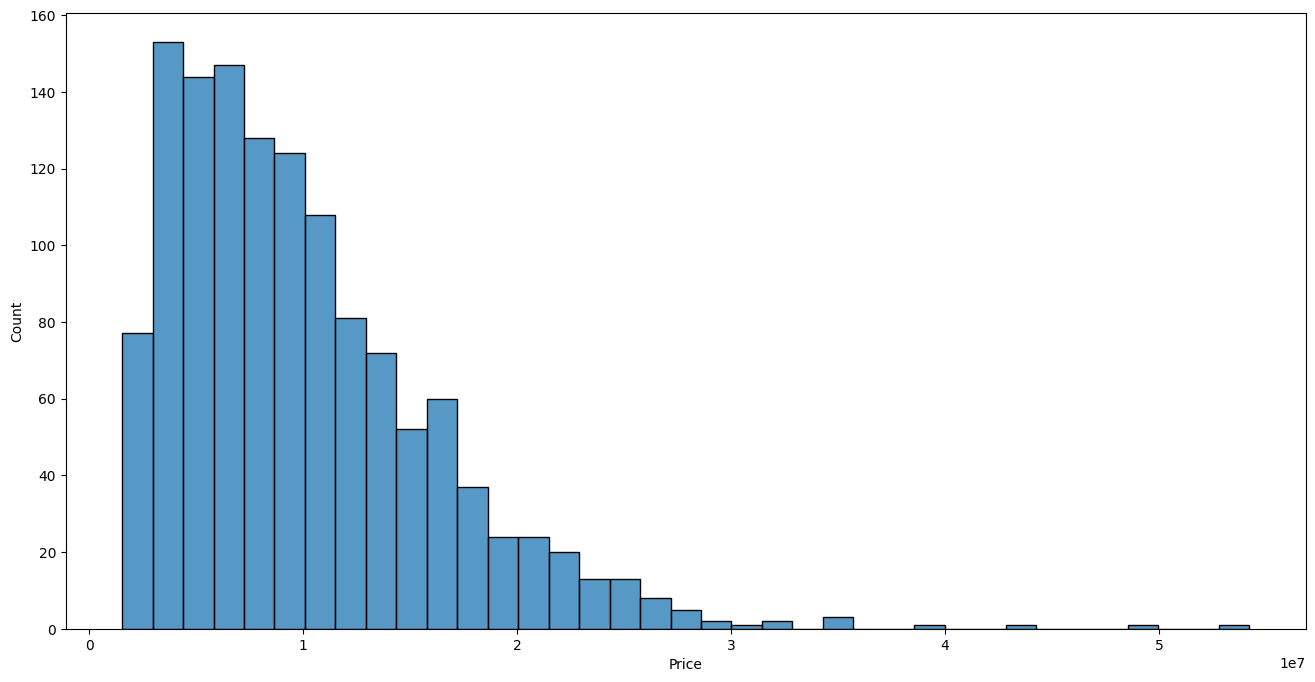

In [190]:
plt.figure(figsize=(16,8))
sns.histplot(data['Price'])

<Axes: xlabel='Manufacturer'>

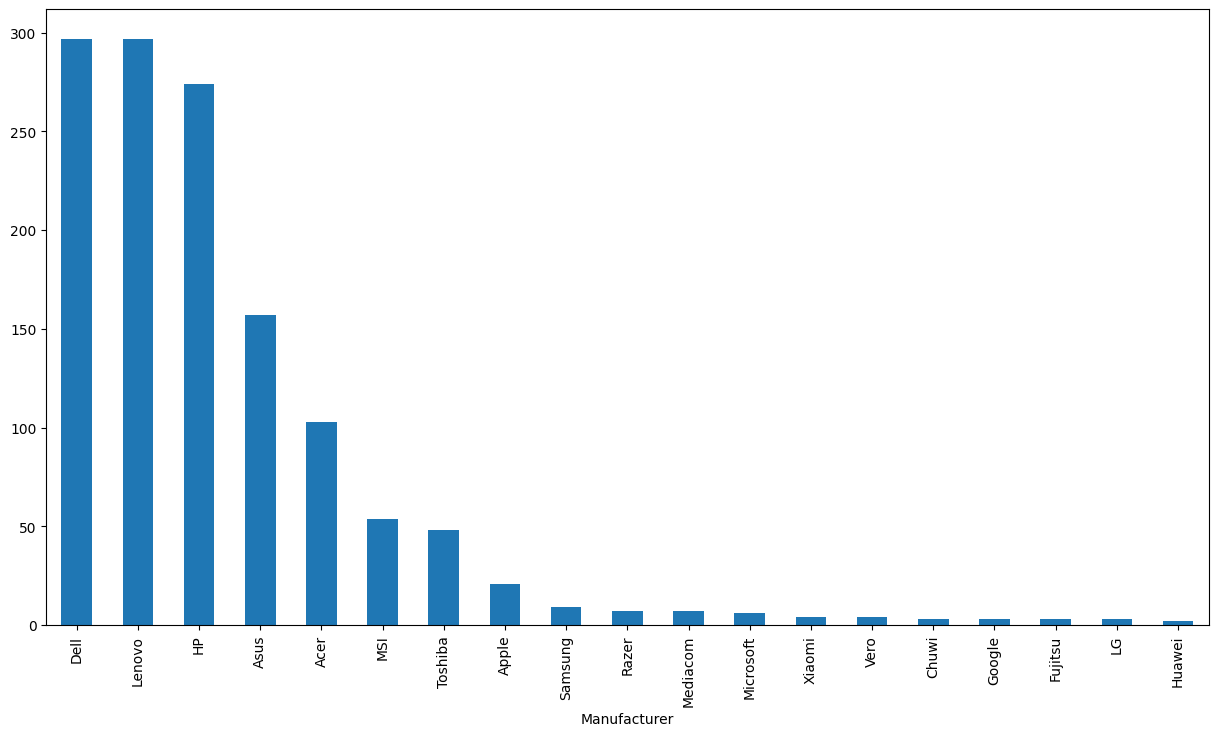

In [191]:
plt.figure(figsize=(15,8))
data['Manufacturer'].value_counts().plot(kind='bar')

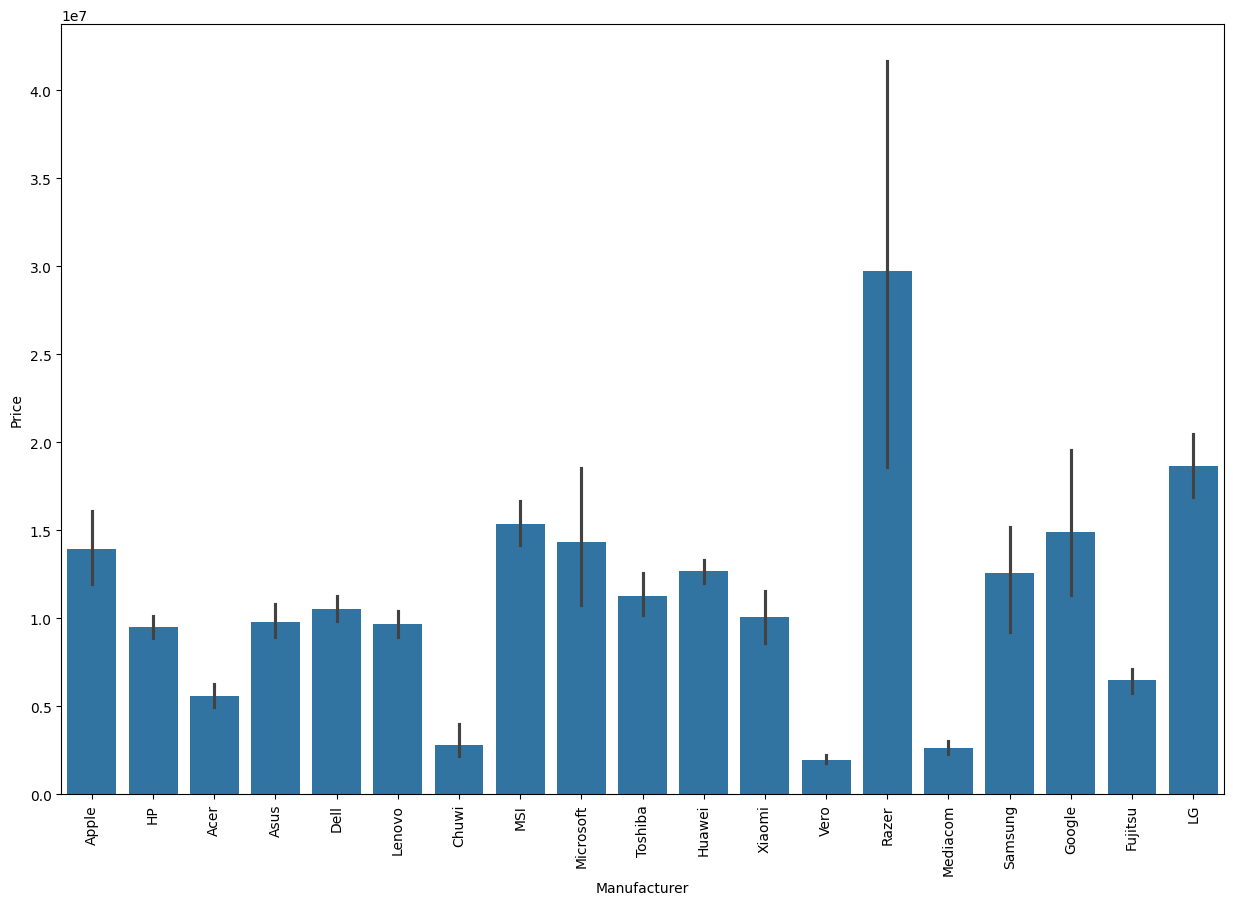

In [192]:
plt.figure(figsize=(15,10))
sns.barplot(x = data['Manufacturer'], y = data['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Category'>

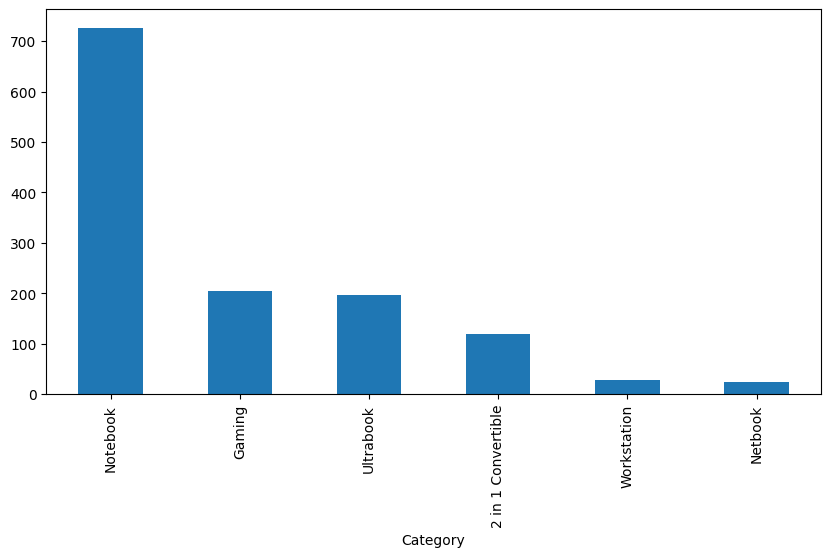

In [193]:
plt.figure(figsize=(10,5))
data['Category'].value_counts().plot(kind='bar')

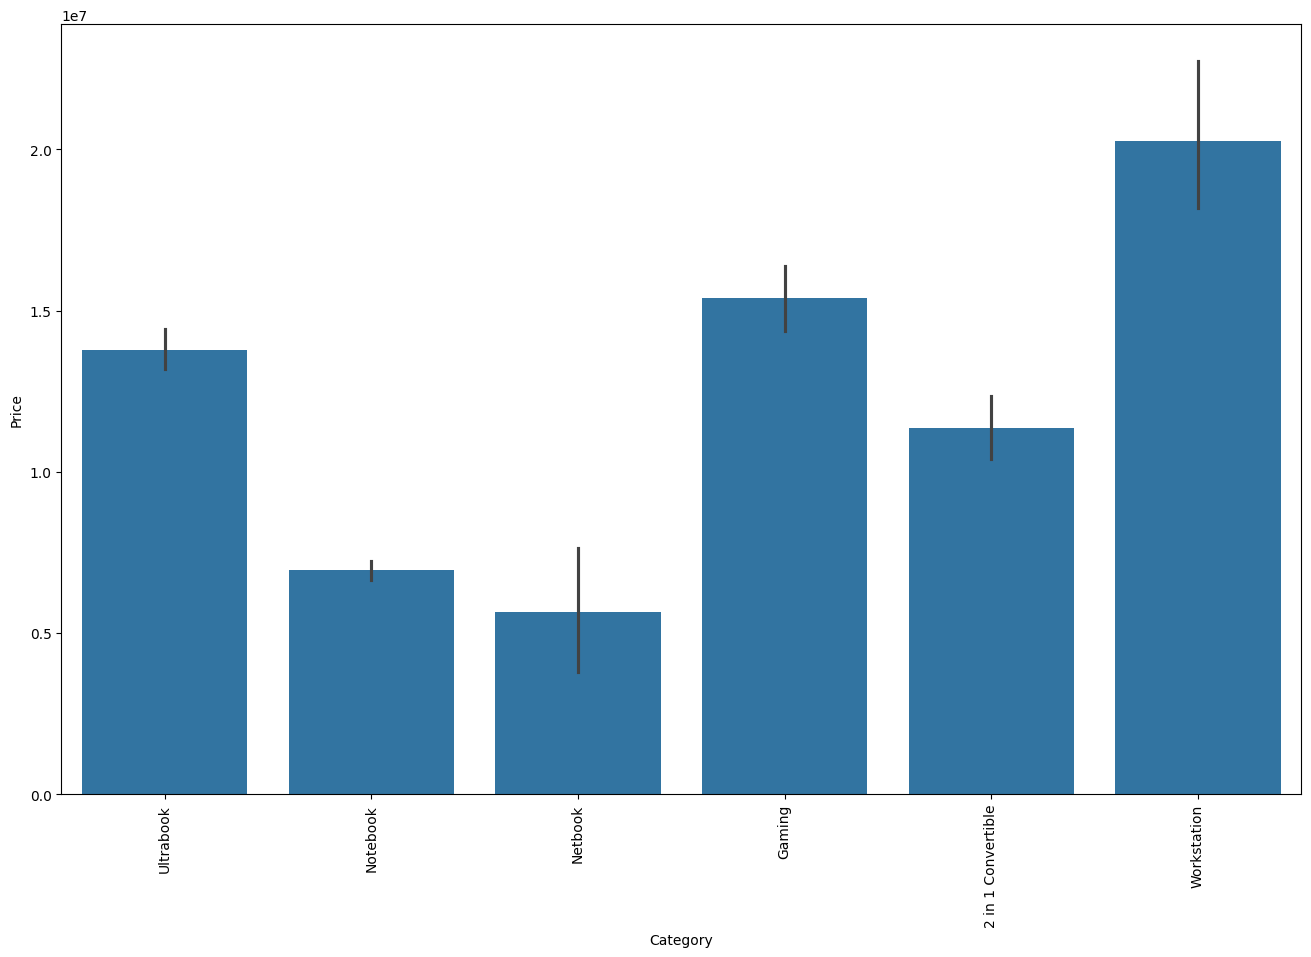

In [194]:
plt.figure(figsize=(16,10))
sns.barplot(x = data['Category'], y = data['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Screen'>

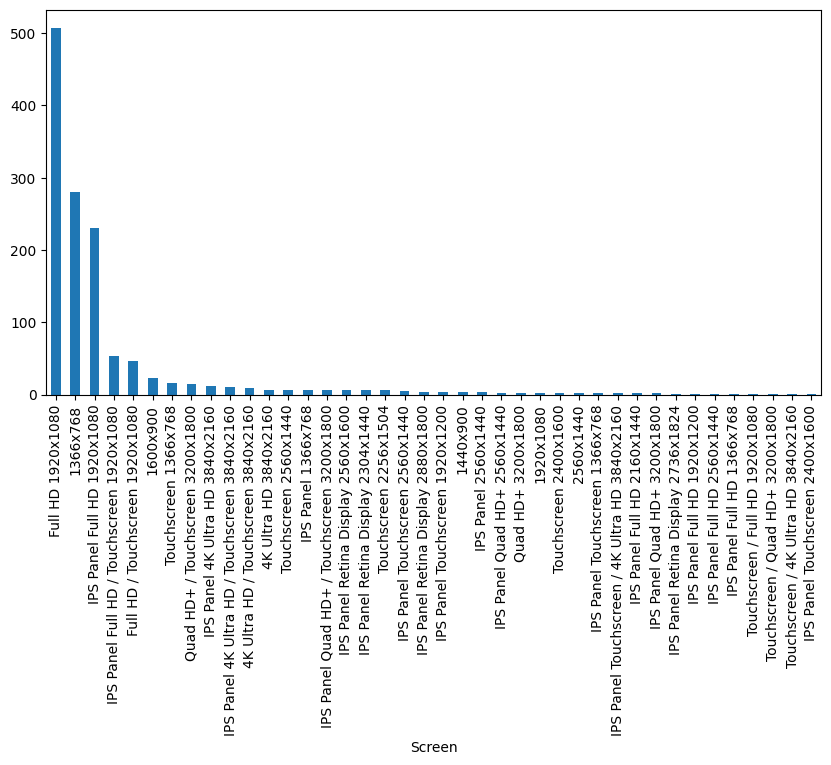

In [195]:
plt.figure(figsize=(10,5))
data['Screen'].value_counts().plot(kind='bar')

In [196]:
data['TouchScreen'] = data['Screen'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
data.sample(20)

,Manufacturer,Model Name,Category,Screen,CPU,Storage,GPU,Operating System,Price,Weight,RAM,Screen Size,TouchScreen
220,Dell,Inspiron 3576,Notebook,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,256GB SSD,AMD Radeon 520,Linux,6022996.20,2.20,8,15.6,0
552,Dell,Alienware 17,Gaming,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,23999508.00,4.42,16,17.3,0
10,Dell,Inspiron 5567,Notebook,1366x768,Intel Core i7 7500U 2.7GHz,1TB HDD,AMD Radeon R7 M445,Windows,6660108.00,2.36,8,15.6,0
106,Lenovo,Ideapad 310-15ISK,Notebook,Full HD 1920x1080,Intel Core i3 6006U 2GHz,1TB HDD,Intel HD Graphics 520,Windows,3689290.80,1.85,4,15.6,0
15,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,256GB SSD,Intel Iris Plus Graphics 640,macOS,13502946.60,1.37,8,13.3,0
273,HP,255 G6,Notebook,1366x768,AMD A6-Series 9220 2.5GHz,500GB HDD,AMD Radeon R4 Graphics,Windows,3547908.00,1.86,4,15.6,0
70,Lenovo,IdeaPad Y900-17ISK,Gaming,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,128GB SSD + 1TB HDD,Nvidia GeForce GTX 980M,Windows,20362591.08,4.60,16,17.3,0
925,Dell,Latitude 3580,Notebook,1366x768,Intel Core i5 6200U 2.3GHz,500GB HDD,Intel HD Graphics 520,Windows,6490270.80,1.95,4,15.6,0
543,Acer,Aspire 7,Gaming,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,1TB HDD,Nvidia GeForce GTX 1050,Linux,7095816.00,2.40,8,15.6,0
115,Dell,Inspiron 5370,Ultrabook,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,256GB SSD,AMD Radeon 530,Windows,7276768.20,1.40,4,13.3,0


<Axes: xlabel='TouchScreen', ylabel='Price'>

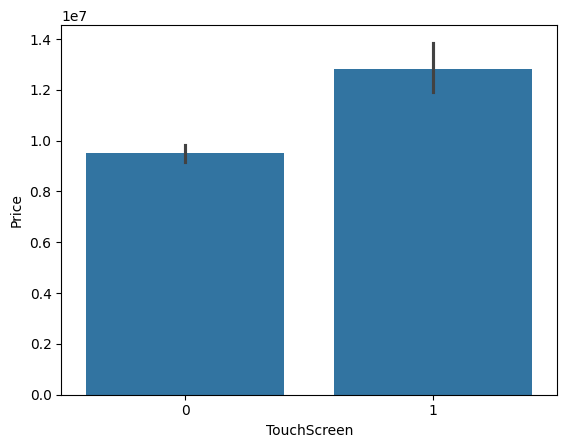

In [197]:
sns.barplot(x = data['TouchScreen'], y = data['Price'])

In [198]:
data['Ips'] = data['Screen'].apply(lambda x: 1 if 'IPS' in x else 0)
data.sample(5)

,Manufacturer,Model Name,Category,Screen,CPU,Storage,GPU,Operating System,Price,Weight,RAM,Screen Size,TouchScreen,Ips
262,HP,ProBook 450,Notebook,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,500GB HDD,Intel HD Graphics 620,Windows,6420024.0,2.10,4,15.6,0,1
445,Dell,Latitude 5480,Notebook,Full HD 1920x1080,Intel Core i5 7440HQ 2.8GHz,256GB SSD,Nvidia GeForce 930MX,Windows,10483668.0,1.64,8,14.0,0,0
199,Lenovo,IdeaPad Y700-15ISK,Gaming,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,512GB SSD,Nvidia GeForce GTX 960,Windows,11604060.0,3.31,16,15.6,0,1
216,Dell,Inspiron 7378,2 in 1 Convertible,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,Windows,10661508.0,1.60,8,13.3,1,1
649,Lenovo,Thinkpad X270,Ultrabook,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,256GB SSD,Intel HD Graphics 620,Windows,14084928.0,1.36,8,12.5,0,1


<Axes: xlabel='Ips', ylabel='Price'>

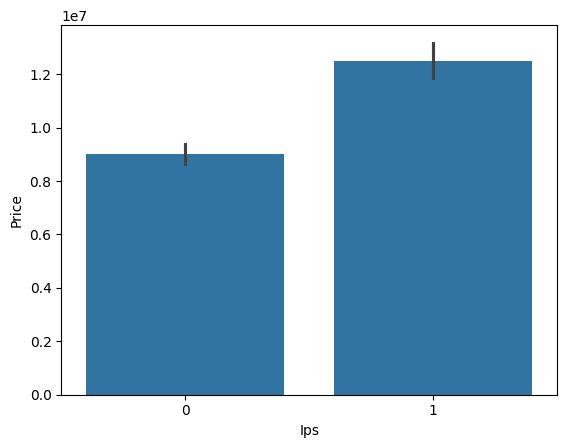

In [199]:
sns.barplot(x = data['Ips'], y = data['Price'])

In [200]:
new = data['Screen'].str.split('x',n=1,expand=True)
data.sample(5)

,Manufacturer,Model Name,Category,Screen,CPU,Storage,GPU,Operating System,Price,Weight,RAM,Screen Size,TouchScreen,Ips
50,Lenovo,Yoga Book,2 in 1 Convertible,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,64GB Flash Storage,Intel HD Graphics 400,Android,2836548.0,0.69,4,10.1,1,1
120,HP,250 G5,Notebook,1366x768,Intel Pentium Quad Core N3710 1.6GHz,1TB HDD,Intel HD Graphics 405,Windows,4446000.0,1.96,4,15.6,0,0
613,Dell,Inspiron 3567,Notebook,1366x768,Intel Core i3 6006U 2.0GHz,1TB HDD,Intel HD Graphics 520,Linux,3192228.0,2.25,4,15.6,0,0
697,Asus,Chromebook Flip,2 in 1 Convertible,Full HD / Touchscreen 1920x1080,Intel Core M M3-6Y30 0.9GHz,64GB Flash Storage,Intel HD Graphics 515,Chrome OS,5948748.0,1.20,4,12.5,1,0
173,HP,15-BA015wm (E2-7110/4GB/500GB/W10),Notebook,1366x768,AMD E-Series 7110 1.8GHz,500GB HDD,AMD Radeon R2 Graphics,Windows,2640924.0,1.86,4,15.6,0,0


In [201]:
data['X_reso'] = new[0]
data['Y_reso'] = new[1]
data.head()

,Manufacturer,Model Name,Category,Screen,CPU,Storage,GPU,Operating System,Price,Weight,RAM,Screen Size,TouchScreen,Ips,X_reso,Y_reso
0,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,11912523.48,1.37,8,13.3,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Macbook Air,Ultrabook,1440x900,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,7993374.48,1.34,8,13.3,0,0,1440,900
2,HP,250 G6,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,5112900.00,1.86,8,15.6,0,0,Full HD 1920,1080
3,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,22563005.40,1.83,16,15.4,0,1,IPS Panel Retina Display 2880,1800
4,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,16037611.20,1.37,8,13.3,0,1,IPS Panel Retina Display 2560,1600


In [202]:
data['X_reso'] = data['X_reso'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
data.head()

,Manufacturer,Model Name,Category,Screen,CPU,Storage,GPU,Operating System,Price,Weight,RAM,Screen Size,TouchScreen,Ips,X_reso,Y_reso
0,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,11912523.48,1.37,8,13.3,0,1,2560,1600
1,Apple,Macbook Air,Ultrabook,1440x900,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,7993374.48,1.34,8,13.3,0,0,1440,900
2,HP,250 G6,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,5112900.00,1.86,8,15.6,0,0,1920,1080
3,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,22563005.40,1.83,16,15.4,0,1,2880,1800
4,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,16037611.20,1.37,8,13.3,0,1,2560,1600


In [203]:
data['X_reso'] = data['X_reso'].astype('int64')
data['Y_reso'] = data['Y_reso'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 324
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      1302 non-null   object 
 1   Model Name        1302 non-null   object 
 2   Category          1302 non-null   object 
 3   Screen            1302 non-null   object 
 4   CPU               1302 non-null   object 
 5   Storage           1302 non-null   object 
 6   GPU               1302 non-null   object 
 7   Operating System  1302 non-null   object 
 8   Price             1302 non-null   float64
 9   Weight            1302 non-null   float64
 10  RAM               1302 non-null   int64  
 11  Screen Size       1302 non-null   float64
 12  TouchScreen       1302 non-null   int64  
 13  Ips               1302 non-null   int64  
 14  X_reso            1302 non-null   int64  
 15  Y_reso            1302 non-null   int64  
dtypes: float64(3), int64(5), object(8)
memory usage:

In [204]:
data['ppi'] = (((data['X_reso']**2 + data['Y_reso']**2)**0.5)/data['Screen Size']).astype('float64')

In [205]:
data['resolution'] = data['X_reso'] * data['Y_reso']
data['resolution'] = data['resolution'].astype('int64')

In [206]:
data = data.drop(['X_reso','Y_reso','Screen Size','Screen'],axis=1)
data.head(20)

,Manufacturer,Model Name,Category,CPU,Storage,GPU,Operating System,Price,Weight,RAM,TouchScreen,Ips,ppi,resolution
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,11912523.48,1.37,8,0,1,226.983005,4096000
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,7993374.48,1.34,8,0,0,127.677940,1296000
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,5112900.00,1.86,8,0,0,141.211998,2073600
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,22563005.40,1.83,16,0,1,220.534624,5184000
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,16037611.20,1.37,8,0,1,226.983005,4096000
5,Acer,Aspire 3,Notebook,AMD A9-Series 9420 3GHz,500GB HDD,AMD Radeon R5,Windows,3556800.00,2.10,4,0,0,100.454670,1049088
6,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.2GHz,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS,19028613.24,2.04,16,0,1,220.534624,5184000
7,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,256GB Flash Storage,Intel HD Graphics 6000,macOS,10303160.40,1.34,8,0,0,127.677940,1296000
8,Asus,ZenBook UX430UN,Ultrabook,Intel Core i7 8550U 1.8GHz,512GB SSD,Nvidia GeForce MX150,Windows,13293540.00,1.30,16,0,0,157.350512,2073600
9,Acer,Swift 3,Ultrabook,Intel Core i5 8250U 1.6GHz,256GB SSD,Intel UHD Graphics 620,Windows,6846840.00,1.60,8,0,1,157.350512,2073600


In [207]:
data['cpu'] = data['CPU'].apply(lambda x: " ".join(x.split()[0:3]))
data.head()

,Manufacturer,Model Name,Category,CPU,Storage,GPU,Operating System,Price,Weight,RAM,TouchScreen,Ips,ppi,resolution,cpu
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,11912523.48,1.37,8,0,1,226.983005,4096000,Intel Core i5
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,7993374.48,1.34,8,0,0,127.677940,1296000,Intel Core i5
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,5112900.00,1.86,8,0,0,141.211998,2073600,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,22563005.40,1.83,16,0,1,220.534624,5184000,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,16037611.20,1.37,8,0,1,226.983005,4096000,Intel Core i5


Creating a function and dividing the CPUs to 5 Categories:
*   Intel i3
*   Intel i5
*   Other Intel Processors
*   Apple Processor
*   AMD

In [208]:
def fetch_processor(text):
    if text in ['Intel Core i5','Intel Core i7','Intel Core i3','Intel Core i9']:
        return text
    elif text.split()[0] == 'Intel':
        return 'Other Intel Processor'
    elif text.upper() in ['M1','M2','M1 PRO','M2 PRO']:
      return 'Apple Processor'
    else:
      return 'AMD Processor'

In [209]:
data['Cpu brand'] = data['cpu'].apply(fetch_processor)

In [210]:
data.head()

,Manufacturer,Model Name,Category,CPU,Storage,GPU,Operating System,Price,Weight,RAM,TouchScreen,Ips,ppi,resolution,cpu,Cpu brand
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,11912523.48,1.37,8,0,1,226.983005,4096000,Intel Core i5,Intel Core i5
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,7993374.48,1.34,8,0,0,127.677940,1296000,Intel Core i5,Intel Core i5
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,5112900.00,1.86,8,0,0,141.211998,2073600,Intel Core i5,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,22563005.40,1.83,16,0,1,220.534624,5184000,Intel Core i7,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,16037611.20,1.37,8,0,1,226.983005,4096000,Intel Core i5,Intel Core i5


In [211]:
data['Clock Speed'] = data['CPU'].str.findall(r'(\d+\.?\d?)').apply(lambda x: x[-1] if len(x) > 0 else 0)

data.sample(20)

,Manufacturer,Model Name,Category,CPU,Storage,GPU,Operating System,Price,Weight,RAM,TouchScreen,Ips,ppi,resolution,cpu,Cpu brand,Clock Speed
205,Acer,Aspire 3,Notebook,Intel Celeron Dual Core N3350 2GHz,500GB HDD,Intel HD Graphics 500,Windows,2961036.0,2.10,4,0,0,100.454670,1049088,Intel Celeron Dual,Other Intel Processor,2
121,Asus,G752VY-GC162T (i7-6700HQ/16GB/1TB,Gaming,Intel Core i7 6700HQ 2.6GHz,128GB SSD + 1TB HDD,Nvidia GeForce GTX 980M,Windows,20442708.0,4.30,16,0,1,127.335675,2073600,Intel Core i7,Intel Core i7,2.6
418,Dell,Inspiron 3567,Notebook,Intel Core i5 7200U 2.5GHz,1TB HDD,Intel HD Graphics 620,Windows,4801235.4,2.14,8,0,0,100.454670,1049088,Intel Core i5,Intel Core i5,2.5
969,Lenovo,IdeaPad 310-15IKB,Notebook,Intel Core i5 7200U 2.5GHz,256GB SSD,Nvidia GeForce 920MX,Windows,6179940.0,2.40,6,0,0,141.211998,2073600,Intel Core i5,Intel Core i5,2.5
832,Asus,VivoBook Max,Notebook,Intel Core i5 7200U 2.5GHz,1TB HDD,Nvidia GeForce 920,Linux,4614948.0,2.10,4,0,0,141.211998,2073600,Intel Core i5,Intel Core i5,2.5
675,MSI,GP62 7RDX,Gaming,Intel Core i7 7700HQ 2.8GHz,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows,11506248.0,2.40,16,0,0,141.211998,2073600,Intel Core i7,Intel Core i7,2.8
146,Asus,VivoBook Max,Notebook,Intel Core i3 7100U 2.4GHz,1TB HDD,Intel HD Graphics 620,Windows,3868020.0,2.00,4,0,0,100.454670,1049088,Intel Core i3,Intel Core i3,2.4
899,Dell,Latitude 5580,Notebook,Intel Core i5 7300U 2.6GHz,500GB HDD,Intel HD Graphics 620,Windows,8314020.0,1.90,8,0,0,141.211998,2073600,Intel Core i5,Intel Core i5,2.6
894,MSI,GS73VR Stealth,Gaming,Intel Core i7 6700HQ 2.6GHz,512GB SSD + 2TB HDD,Nvidia GeForce GTX 1060,Windows,23554908.0,2.43,16,0,1,254.671349,8294400,Intel Core i7,Intel Core i7,2.6
626,Mediacom,SmartBook 140,Notebook,Intel Atom x5-Z8350 1.44GHz,32GB Flash Storage,Intel HD Graphics,Windows,2125188.0,1.40,2,0,0,157.350512,2073600,Intel Atom x5-Z8350,Other Intel Processor,4


<Axes: xlabel='Clock Speed', ylabel='Price'>

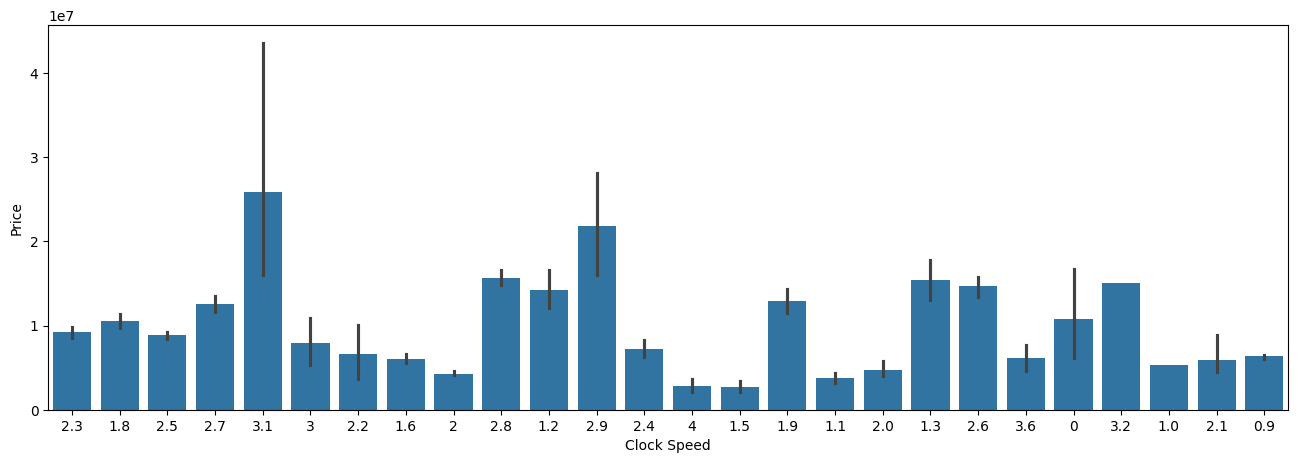

In [212]:
plt.figure(figsize=(16,5))
sns.barplot(x = data['Clock Speed'], y = data['Price'])

In [213]:
mode_clock_speed = data['Clock Speed'].astype('float64').mode()
print(mode_clock_speed[0])

2.5


In [214]:
data['Clock Speed'] = data['Clock Speed'].apply(lambda x: mode_clock_speed[0] if x == "0" else x)

<Axes: xlabel='Clock Speed', ylabel='Price'>

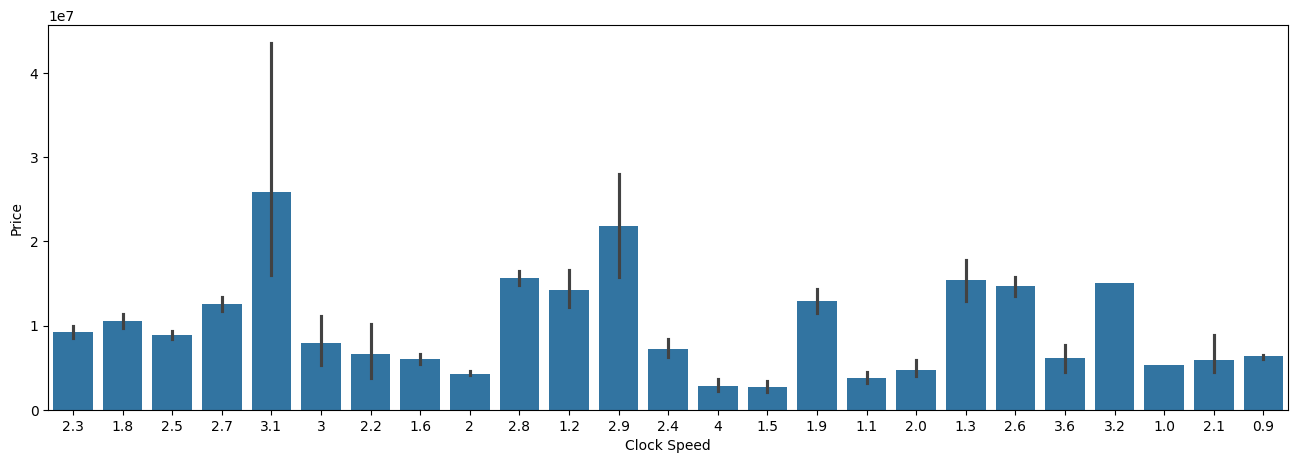

In [215]:
plt.figure(figsize=(16,5))
sns.barplot(x = data['Clock Speed'], y = data['Price'])

<Axes: xlabel='Cpu brand'>

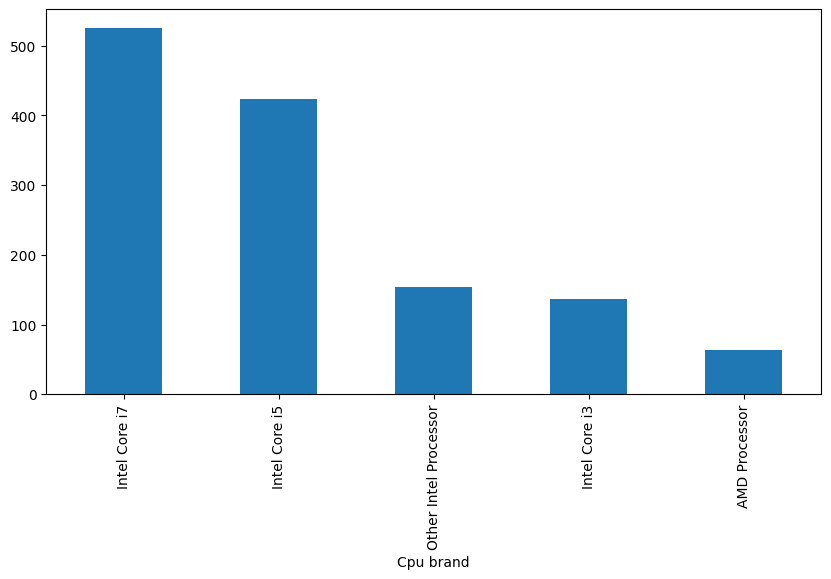

In [216]:
plt.figure(figsize=(10,5))
data['Cpu brand'].value_counts().plot(kind='bar')

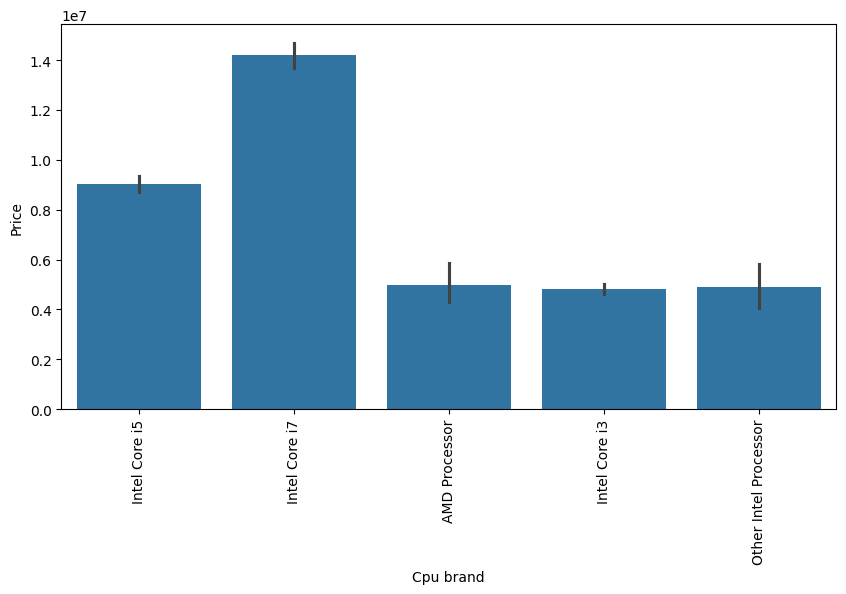

In [217]:
plt.figure(figsize=(10,5))
sns.barplot(x = data['Cpu brand'], y = data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [218]:
data.drop(columns=['CPU','cpu'],inplace=True)
data.head()

,Manufacturer,Model Name,Category,Storage,GPU,Operating System,Price,Weight,RAM,TouchScreen,Ips,ppi,resolution,Cpu brand,Clock Speed
0,Apple,MacBook Pro,Ultrabook,128GB SSD,Intel Iris Plus Graphics 640,macOS,11912523.48,1.37,8,0,1,226.983005,4096000,Intel Core i5,2.3
1,Apple,Macbook Air,Ultrabook,128GB Flash Storage,Intel HD Graphics 6000,macOS,7993374.48,1.34,8,0,0,127.677940,1296000,Intel Core i5,1.8
2,HP,250 G6,Notebook,256GB SSD,Intel HD Graphics 620,No OS,5112900.00,1.86,8,0,0,141.211998,2073600,Intel Core i5,2.5
3,Apple,MacBook Pro,Ultrabook,512GB SSD,AMD Radeon Pro 455,macOS,22563005.40,1.83,16,0,1,220.534624,5184000,Intel Core i7,2.7
4,Apple,MacBook Pro,Ultrabook,256GB SSD,Intel Iris Plus Graphics 650,macOS,16037611.20,1.37,8,0,1,226.983005,4096000,Intel Core i5,3.1


<Axes: xlabel='RAM'>

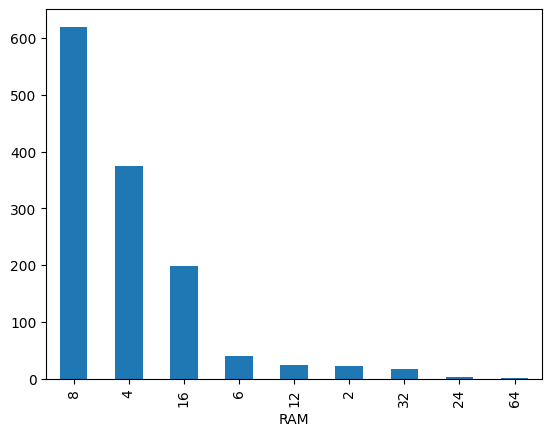

In [219]:
data['RAM'].value_counts().plot(kind='bar')

<Axes: xlabel='RAM', ylabel='Price'>

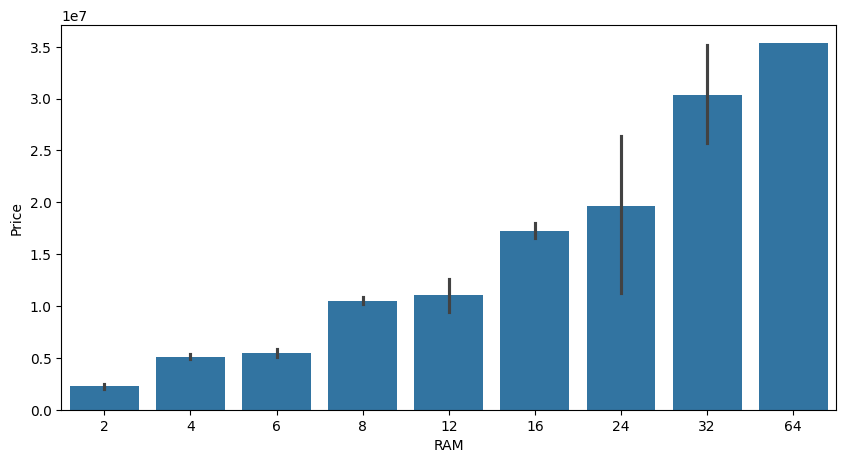

In [220]:
plt.figure(figsize=(10,5))
sns.barplot(x = data['RAM'], y = data['Price'])

In [221]:
data['Storage'].value_counts()

,count
Storage,
256GB SSD,412
1TB HDD,224
500GB HDD,132
512GB SSD,118
128GB SSD + 1TB HDD,94
128GB SSD,76
256GB SSD + 1TB HDD,73
32GB Flash Storage,38
2TB HDD,16


In [222]:
data.head()

,Manufacturer,Model Name,Category,Storage,GPU,Operating System,Price,Weight,RAM,TouchScreen,Ips,ppi,resolution,Cpu brand,Clock Speed
0,Apple,MacBook Pro,Ultrabook,128GB SSD,Intel Iris Plus Graphics 640,macOS,11912523.48,1.37,8,0,1,226.983005,4096000,Intel Core i5,2.3
1,Apple,Macbook Air,Ultrabook,128GB Flash Storage,Intel HD Graphics 6000,macOS,7993374.48,1.34,8,0,0,127.677940,1296000,Intel Core i5,1.8
2,HP,250 G6,Notebook,256GB SSD,Intel HD Graphics 620,No OS,5112900.00,1.86,8,0,0,141.211998,2073600,Intel Core i5,2.5
3,Apple,MacBook Pro,Ultrabook,512GB SSD,AMD Radeon Pro 455,macOS,22563005.40,1.83,16,0,1,220.534624,5184000,Intel Core i7,2.7
4,Apple,MacBook Pro,Ultrabook,256GB SSD,Intel Iris Plus Graphics 650,macOS,16037611.20,1.37,8,0,1,226.983005,4096000,Intel Core i5,3.1


In [223]:
new = data['Storage'].str.split('+',n=1,expand=True)
print(new)
# data['Storage'].shape
data['first'] = new[0]
data['first'] = data['first'].str.strip()
data['sec'] = new[1].str.strip()

                       0     1
0              128GB SSD  None
1    128GB Flash Storage  None
2              256GB SSD  None
3              512GB SSD  None
4              256GB SSD  None
..                   ...   ...
320            128GB SSD  None
321            512GB SSD  None
322   64GB Flash Storage  None
323              1TB HDD  None
324            500GB HDD  None

[1302 rows x 2 columns]


In [224]:
data['l1hdd'] = data['first'].apply(lambda x: 1 if "HDD" in x else 0)
data['l1ssd'] = data['first'].apply(lambda x: 1 if "SSD" in x else 0)
data['l1hybrid'] = data['first'].apply(lambda x: 1 if "Hybrid" in x else 0)
data['l1fs'] = data['first'].apply(lambda x: 1 if "Flash Storage" in x else 0)
data['first'] = data['first'].str.replace(r'\D', '', regex=True)
# str.replace(r'\D','') is replacing all non-digit characters in the string
data['sec'].fillna('0',inplace=True)

<ipython-input-224-513b7dd10999>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['sec'].fillna('0',inplace=True)


In [225]:
data['l2hdd'] = data['sec'].apply(lambda x: 1 if "HDD" in x else 0)
data['l2ssd'] = data['sec'].apply(lambda x: 1 if "SSD" in x else 0)
data['l2hybrid'] = data['sec'].apply(lambda x: 1 if "Hybrid" in x else 0)
data['l2fs'] = data['sec'].apply(lambda x: 1 if "Flash Storage" in x else 0)
data['sec'] = data['sec'].str.replace(r'\D', '', regex=True)

In [226]:
data['first'] = data['first'].astype('int')
data['sec'] = data['sec'].astype('int')
data.head()

,Manufacturer,Model Name,Category,Storage,GPU,Operating System,Price,Weight,RAM,TouchScreen,...,first,sec,l1hdd,l1ssd,l1hybrid,l1fs,l2hdd,l2ssd,l2hybrid,l2fs
0,Apple,MacBook Pro,Ultrabook,128GB SSD,Intel Iris Plus Graphics 640,macOS,11912523.48,1.37,8,0,...,128,0,0,1,0,0,0,0,0,0
1,Apple,Macbook Air,Ultrabook,128GB Flash Storage,Intel HD Graphics 6000,macOS,7993374.48,1.34,8,0,...,128,0,0,0,0,1,0,0,0,0
2,HP,250 G6,Notebook,256GB SSD,Intel HD Graphics 620,No OS,5112900.00,1.86,8,0,...,256,0,0,1,0,0,0,0,0,0
3,Apple,MacBook Pro,Ultrabook,512GB SSD,AMD Radeon Pro 455,macOS,22563005.40,1.83,16,0,...,512,0,0,1,0,0,0,0,0,0
4,Apple,MacBook Pro,Ultrabook,256GB SSD,Intel Iris Plus Graphics 650,macOS,16037611.20,1.37,8,0,...,256,0,0,1,0,0,0,0,0,0


In [227]:
data['HDD'] = data['first']*data['l1hdd'] + data['sec']*data['l2hdd']
data['SSD'] = data['first']*data['l1ssd'] + data['sec']*data['l2ssd']
data['Hybrid'] = data['first']*data['l1hybrid'] + data['sec']*data['l2hybrid']
data['FS'] = data['first']*data['l1fs'] + data['sec']*data['l2fs']
data.drop(columns=['first','sec','l1hdd','l1ssd','l1hybrid','l1fs','l2hdd','l2ssd','l2fs','l2hybrid'],inplace=True)

In [228]:
data.head()

,Manufacturer,Model Name,Category,Storage,GPU,Operating System,Price,Weight,RAM,TouchScreen,Ips,ppi,resolution,Cpu brand,Clock Speed,HDD,SSD,Hybrid,FS
0,Apple,MacBook Pro,Ultrabook,128GB SSD,Intel Iris Plus Graphics 640,macOS,11912523.48,1.37,8,0,1,226.983005,4096000,Intel Core i5,2.3,0,128,0,0
1,Apple,Macbook Air,Ultrabook,128GB Flash Storage,Intel HD Graphics 6000,macOS,7993374.48,1.34,8,0,0,127.677940,1296000,Intel Core i5,1.8,0,0,0,128
2,HP,250 G6,Notebook,256GB SSD,Intel HD Graphics 620,No OS,5112900.00,1.86,8,0,0,141.211998,2073600,Intel Core i5,2.5,0,256,0,0
3,Apple,MacBook Pro,Ultrabook,512GB SSD,AMD Radeon Pro 455,macOS,22563005.40,1.83,16,0,1,220.534624,5184000,Intel Core i7,2.7,0,512,0,0
4,Apple,MacBook Pro,Ultrabook,256GB SSD,Intel Iris Plus Graphics 650,macOS,16037611.20,1.37,8,0,1,226.983005,4096000,Intel Core i5,3.1,0,256,0,0


In [229]:
data.drop(columns=['Storage'],inplace=True)
data.sample(5)

,Manufacturer,Model Name,Category,GPU,Operating System,Price,Weight,RAM,TouchScreen,Ips,ppi,resolution,Cpu brand,Clock Speed,HDD,SSD,Hybrid,FS
416,Dell,Latitude 3380,Notebook,Intel HD Graphics 520,Windows,6126588.00,1.65,4,0,0,117.826530,1049088,Intel Core i3,2,0,128,0,0
394,Dell,Inspiron 5567,Notebook,AMD Radeon R7 M445,Linux,6925712.04,2.33,8,0,0,141.211998,2073600,Intel Core i7,2.7,0,256,0,0
1,Asus,Rog GL753VE-DS74,Gaming,Nvidia GeForce GTX 1050 Ti,Windows,15552108.00,2.99,16,0,0,127.335675,2073600,Intel Core i7,2.8,1,256,0,0
576,Toshiba,Tecra X40-D-10H,Ultrabook,Intel HD Graphics 620,Windows,16583580.00,1.24,16,1,0,157.350512,2073600,Intel Core i7,2.7,0,512,0,0
862,Toshiba,Portege X30-D-10X,Notebook,Intel HD Graphics 620,Windows,11426220.00,1.05,4,0,0,165.632118,2073600,Intel Core i5,2.5,0,128,0,0


In [230]:
data = data.drop('Model Name',axis=1)
data.sample(5)

,Manufacturer,Category,GPU,Operating System,Price,Weight,RAM,TouchScreen,Ips,ppi,resolution,Cpu brand,Clock Speed,HDD,SSD,Hybrid,FS
861,HP,Notebook,AMD Radeon R7 M465,Windows,11995308.00,1.84,8,0,0,141.211998,2073600,Intel Core i5,2.6,0,256,0,0
128,MSI,Gaming,Nvidia GeForce GTX 960M,Windows,13437501.48,2.90,8,0,0,127.335675,2073600,Intel Core i7,2.6,1,128,0,0
314,Asus,2 in 1 Convertible,Intel HD Graphics 500,Windows,2445300.00,1.10,2,1,0,135.094211,1049088,Other Intel Processor,1.1,0,0,0,32
65,Lenovo,Notebook,Intel HD Graphics 520,Windows,9333043.20,2.30,8,0,0,141.211998,2073600,Intel Core i5,2.3,0,256,0,0
788,Acer,Gaming,Nvidia GeForce GTX 1060,Windows,20442708.00,4.20,16,0,1,127.335675,2073600,Intel Core i7,2.8,1,256,0,0


In [231]:
data = data.rename(columns={'Ips':'IPS'})

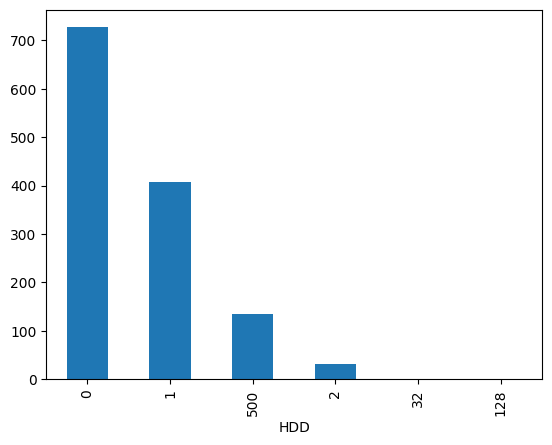

In [232]:
data['HDD'].value_counts().plot(kind='bar')
plt.show()
data['HDD'] = data['HDD'].apply(lambda x: x*1024 if x==1 or x==2 else x)

In [233]:
data.drop(columns={'Hybrid','FS'},inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 324
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      1302 non-null   object 
 1   Category          1302 non-null   object 
 2   GPU               1302 non-null   object 
 3   Operating System  1302 non-null   object 
 4   Price             1302 non-null   float64
 5   Weight            1302 non-null   float64
 6   RAM               1302 non-null   int64  
 7   TouchScreen       1302 non-null   int64  
 8   IPS               1302 non-null   int64  
 9   ppi               1302 non-null   float64
 10  resolution        1302 non-null   int64  
 11  Cpu brand         1302 non-null   object 
 12  Clock Speed       1302 non-null   object 
 13  HDD               1302 non-null   int64  
 14  SSD               1302 non-null   int64  
dtypes: float64(3), int64(6), object(6)
memory usage: 162.8+ KB


In [234]:
data['Price'] = data['Price']/100
data.head(10)

,Manufacturer,Category,GPU,Operating System,Price,Weight,RAM,TouchScreen,IPS,ppi,resolution,Cpu brand,Clock Speed,HDD,SSD
0,Apple,Ultrabook,Intel Iris Plus Graphics 640,macOS,119125.2348,1.37,8,0,1,226.983005,4096000,Intel Core i5,2.3,0,128
1,Apple,Ultrabook,Intel HD Graphics 6000,macOS,79933.7448,1.34,8,0,0,127.677940,1296000,Intel Core i5,1.8,0,0
2,HP,Notebook,Intel HD Graphics 620,No OS,51129.0000,1.86,8,0,0,141.211998,2073600,Intel Core i5,2.5,0,256
3,Apple,Ultrabook,AMD Radeon Pro 455,macOS,225630.0540,1.83,16,0,1,220.534624,5184000,Intel Core i7,2.7,0,512
4,Apple,Ultrabook,Intel Iris Plus Graphics 650,macOS,160376.1120,1.37,8,0,1,226.983005,4096000,Intel Core i5,3.1,0,256
5,Acer,Notebook,AMD Radeon R5,Windows,35568.0000,2.10,4,0,0,100.454670,1049088,AMD Processor,3,500,0
6,Apple,Ultrabook,Intel Iris Pro Graphics,Mac OS,190286.1324,2.04,16,0,1,220.534624,5184000,Intel Core i7,2.2,0,0
7,Apple,Ultrabook,Intel HD Graphics 6000,macOS,103031.6040,1.34,8,0,0,127.677940,1296000,Intel Core i5,1.8,0,0
8,Asus,Ultrabook,Nvidia GeForce MX150,Windows,132935.4000,1.30,16,0,0,157.350512,2073600,Intel Core i7,1.8,0,512
9,Acer,Ultrabook,Intel UHD Graphics 620,Windows,68468.4000,1.60,8,0,1,157.350512,2073600,Intel Core i5,1.6,0,256


In [235]:
data['Price'] = data['Price'].round(decimals = 2)
data.head()

,Manufacturer,Category,GPU,Operating System,Price,Weight,RAM,TouchScreen,IPS,ppi,resolution,Cpu brand,Clock Speed,HDD,SSD
0,Apple,Ultrabook,Intel Iris Plus Graphics 640,macOS,119125.23,1.37,8,0,1,226.983005,4096000,Intel Core i5,2.3,0,128
1,Apple,Ultrabook,Intel HD Graphics 6000,macOS,79933.74,1.34,8,0,0,127.677940,1296000,Intel Core i5,1.8,0,0
2,HP,Notebook,Intel HD Graphics 620,No OS,51129.00,1.86,8,0,0,141.211998,2073600,Intel Core i5,2.5,0,256
3,Apple,Ultrabook,AMD Radeon Pro 455,macOS,225630.05,1.83,16,0,1,220.534624,5184000,Intel Core i7,2.7,0,512
4,Apple,Ultrabook,Intel Iris Plus Graphics 650,macOS,160376.11,1.37,8,0,1,226.983005,4096000,Intel Core i5,3.1,0,256


In [236]:
data['gpu'] = data['GPU'].apply(lambda x:x.split()[0])
data['gpu'].value_counts()

,count
gpu,
Intel,722
Nvidia,399
AMD,180
ARM,1


<Axes: xlabel='gpu', ylabel='Price'>

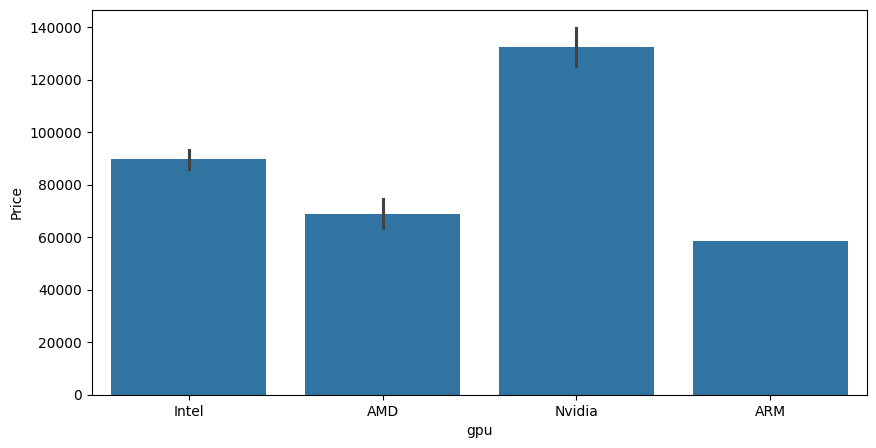

In [237]:
plt.figure(figsize=(10,5))
sns.barplot(x = data['gpu'], y = data['Price'])

In [238]:
data = data[data['gpu'] != 'ARM']
data['gpu'].value_counts()

,count
gpu,
Intel,722
Nvidia,399
AMD,180


<Axes: xlabel='gpu', ylabel='Price'>

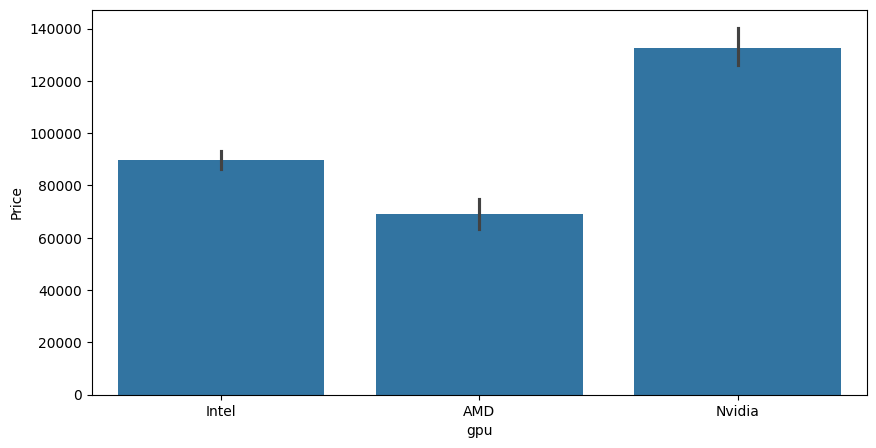

In [239]:
plt.figure(figsize=(10,5))
sns.barplot(x = data['gpu'], y = data['Price'])

In [240]:
data = data.drop('GPU',axis=1)
data.head()

,Manufacturer,Category,Operating System,Price,Weight,RAM,TouchScreen,IPS,ppi,resolution,Cpu brand,Clock Speed,HDD,SSD,gpu
0,Apple,Ultrabook,macOS,119125.23,1.37,8,0,1,226.983005,4096000,Intel Core i5,2.3,0,128,Intel
1,Apple,Ultrabook,macOS,79933.74,1.34,8,0,0,127.677940,1296000,Intel Core i5,1.8,0,0,Intel
2,HP,Notebook,No OS,51129.00,1.86,8,0,0,141.211998,2073600,Intel Core i5,2.5,0,256,Intel
3,Apple,Ultrabook,macOS,225630.05,1.83,16,0,1,220.534624,5184000,Intel Core i7,2.7,0,512,AMD
4,Apple,Ultrabook,macOS,160376.11,1.37,8,0,1,226.983005,4096000,Intel Core i5,3.1,0,256,Intel


In [241]:
data['Operating System'].value_counts()

,count
Operating System,
Windows,1124
No OS,66
Linux,62
Chrome OS,26
macOS,13
Mac OS,8
Android,2


<Axes: xlabel='Operating System', ylabel='Price'>

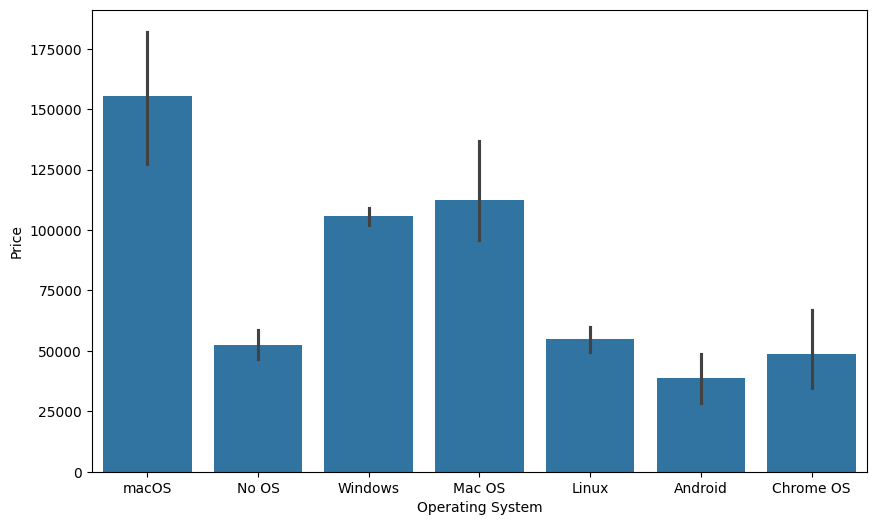

In [242]:
plt.figure(figsize=(10,6))
sns.barplot(x = data['Operating System'], y = data['Price'])

In [243]:
def merge_os(os):
    if os == 'Windows':
        return os
    elif os == 'macOS' or os == 'Mac OS':
        return 'Mac'
    elif os == 'Linux':
        return os
    else:
        return 'Others/No OS'

In [244]:
data['OS'] = data['Operating System'].apply(merge_os)
data.head()

,Manufacturer,Category,Operating System,Price,Weight,RAM,TouchScreen,IPS,ppi,resolution,Cpu brand,Clock Speed,HDD,SSD,gpu,OS
0,Apple,Ultrabook,macOS,119125.23,1.37,8,0,1,226.983005,4096000,Intel Core i5,2.3,0,128,Intel,Mac
1,Apple,Ultrabook,macOS,79933.74,1.34,8,0,0,127.677940,1296000,Intel Core i5,1.8,0,0,Intel,Mac
2,HP,Notebook,No OS,51129.00,1.86,8,0,0,141.211998,2073600,Intel Core i5,2.5,0,256,Intel,Others/No OS
3,Apple,Ultrabook,macOS,225630.05,1.83,16,0,1,220.534624,5184000,Intel Core i7,2.7,0,512,AMD,Mac
4,Apple,Ultrabook,macOS,160376.11,1.37,8,0,1,226.983005,4096000,Intel Core i5,3.1,0,256,Intel,Mac


In [245]:
data.drop(columns=['Operating System'],inplace=True)
data.head()

,Manufacturer,Category,Price,Weight,RAM,TouchScreen,IPS,ppi,resolution,Cpu brand,Clock Speed,HDD,SSD,gpu,OS
0,Apple,Ultrabook,119125.23,1.37,8,0,1,226.983005,4096000,Intel Core i5,2.3,0,128,Intel,Mac
1,Apple,Ultrabook,79933.74,1.34,8,0,0,127.677940,1296000,Intel Core i5,1.8,0,0,Intel,Mac
2,HP,Notebook,51129.00,1.86,8,0,0,141.211998,2073600,Intel Core i5,2.5,0,256,Intel,Others/No OS
3,Apple,Ultrabook,225630.05,1.83,16,0,1,220.534624,5184000,Intel Core i7,2.7,0,512,AMD,Mac
4,Apple,Ultrabook,160376.11,1.37,8,0,1,226.983005,4096000,Intel Core i5,3.1,0,256,Intel,Mac


<Axes: xlabel='OS', ylabel='Price'>

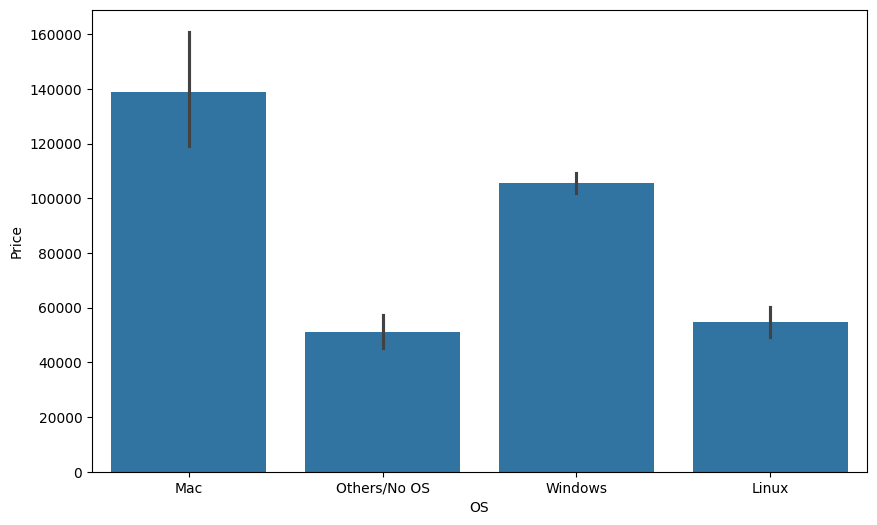

In [246]:
plt.figure(figsize=(10,6))
sns.barplot(x = data['OS'], y = data['Price'])

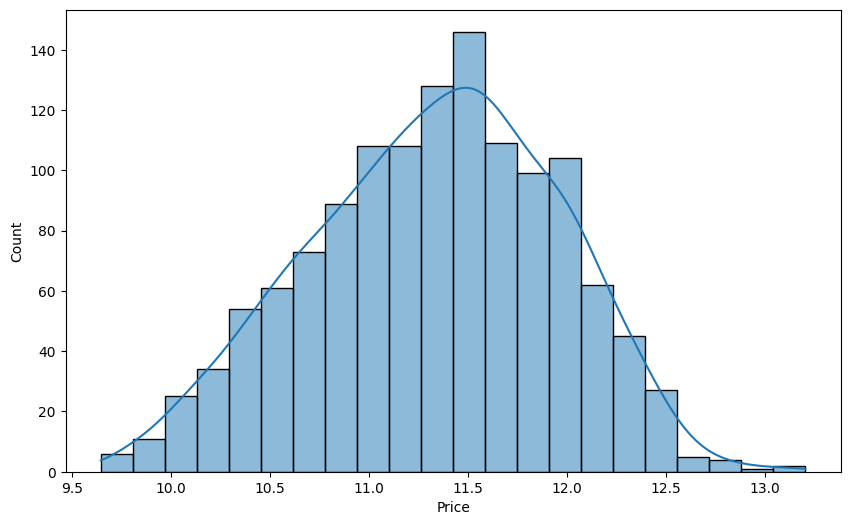

In [247]:
plt.figure(figsize=(10,6))
sns.histplot(np.log(data['Price']),kde=True)
plt.show()

**Prediction Model**

In [248]:
x = data.drop('Price',axis=1)
y = np.log(data['Price'])

In [249]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1301 entries, 0 to 324
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manufacturer  1301 non-null   object 
 1   Category      1301 non-null   object 
 2   Price         1301 non-null   float64
 3   Weight        1301 non-null   float64
 4   RAM           1301 non-null   int64  
 5   TouchScreen   1301 non-null   int64  
 6   IPS           1301 non-null   int64  
 7   ppi           1301 non-null   float64
 8   resolution    1301 non-null   int64  
 9   Cpu brand     1301 non-null   object 
 10  Clock Speed   1301 non-null   object 
 11  HDD           1301 non-null   int64  
 12  SSD           1301 non-null   int64  
 13  gpu           1301 non-null   object 
 14  OS            1301 non-null   object 
dtypes: float64(3), int64(6), object(6)
memory usage: 162.6+ KB


In [250]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15,random_state=2)

In [251]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [252]:
lst = []

s1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,8,12,13])],remainder='passthrough')

lreg = LinearRegression()
pipe = Pipeline([
     ('s1',s1),
     ('lreg',lreg)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

lr = []
lr.append(r2_score(y_test,y_pred))
lr.append(mean_absolute_error(y_test,y_pred))
lr.append(mean_squared_error(y_test,y_pred))
lr.append(mean_squared_error(y_test,y_pred, squared=False))


print('R2 Score: ', r2_score(y_test,y_pred))
print('Mean Absolute Error (MAE): ', mean_absolute_error(y_test,y_pred))
print(f'Mean Squared Error (MSE): ', mean_squared_error(y_test,y_pred))
print( f'Root Mean Squared Error (RMSE): ', mean_squared_error(y_test,y_pred, squared=False))

R2 Score:  0.7905303579205771
Mean Absolute Error (MAE):  0.21039794428655414
Mean Squared Error (MSE):  0.07614613235096837
Root Mean Squared Error (RMSE):  0.2759458866353481


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [253]:
s1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,8,12,13])],remainder='passthrough')

knn = KNeighborsRegressor(n_neighbors=6)
pipe = Pipeline([
     ('s1',s1),
     ('s2',knn)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)
knn_2 = []
knn_2.append(r2_score(y_test,y_pred))
knn_2.append(mean_absolute_error(y_test,y_pred))
knn_2.append(mean_squared_error(y_test,y_pred))
knn_2.append(mean_squared_error(y_test,y_pred, squared=False))


print('R2 Score: ', r2_score(y_test,y_pred))
print('Mean Absolute Error (MAE): ', mean_absolute_error(y_test,y_pred))
print(f'Mean Squared Error (MSE): ', mean_squared_error(y_test,y_pred))
print( f'Root Mean Squared Error (RMSE): ', mean_squared_error(y_test,y_pred, squared=False))

R2 Score:  0.8254395799556995
Mean Absolute Error (MAE):  0.20034399920172632
Mean Squared Error (MSE):  0.06345597727662168
Root Mean Squared Error (RMSE):  0.2519046987982195


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [254]:
s1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,8,12,13])],remainder='passthrough')

dtr = DecisionTreeRegressor(max_depth=8)
pipe = Pipeline([
     ('s1',s1),
     ('s2',dtr)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

dtree = []
dtree.append(r2_score(y_test,y_pred))
dtree.append(mean_absolute_error(y_test,y_pred))
dtree.append(mean_squared_error(y_test,y_pred))
dtree.append(mean_squared_error(y_test,y_pred, squared=False))

print('R2 Score: ', r2_score(y_test,y_pred))
print('Mean Absolute Error (MAE): ', mean_absolute_error(y_test,y_pred))
print(f'Mean Squared Error (MSE): ', mean_squared_error(y_test,y_pred))
print( f'Root Mean Squared Error (RMSE): ', mean_squared_error(y_test,y_pred, squared=False))

R2 Score:  0.7732351416981855
Mean Absolute Error (MAE):  0.21410993513271587
Mean Squared Error (MSE):  0.0824332668991312
Root Mean Squared Error (RMSE):  0.28711194140810514


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [255]:
s1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,8,12,13])],remainder='passthrough')

rrr = RandomForestRegressor()
pipe = Pipeline([
     ('s1',s1),
     ('s2',rrr)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

random_for = []

random_for.append(r2_score(y_test,y_pred))
random_for.append(mean_absolute_error(y_test,y_pred))
random_for.append(mean_squared_error(y_test,y_pred))
random_for.append(mean_squared_error(y_test,y_pred, squared=False))

print('R2 Score: ', r2_score(y_test,y_pred))
print('Mean Absolute Error (MAE): ', mean_absolute_error(y_test,y_pred))
print(f'Mean Squared Error (MSE): ', mean_squared_error(y_test,y_pred))
print( f'Root Mean Squared Error (RMSE): ', mean_squared_error(y_test,y_pred, squared=False))

R2 Score:  0.8739935191359047
Mean Absolute Error (MAE):  0.15886408430456317
Mean Squared Error (MSE):  0.04580571233954339
Root Mean Squared Error (RMSE):  0.2140226911790976


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


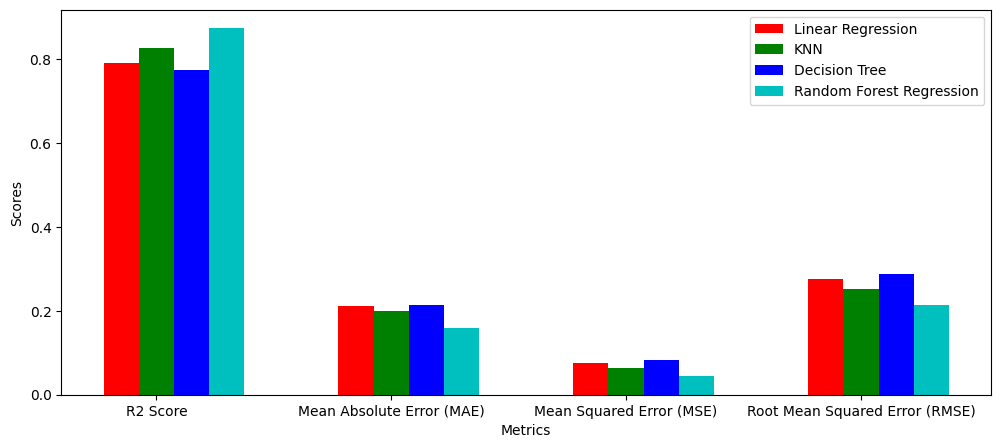

In [256]:
N = 4
ind = np.arange(N)

width = 0.15

plt.figure(figsize=(12,5))

bar1 = plt.bar(ind, lr, width, color = 'r')

bar2 = plt.bar(ind+width, knn_2, width, color='g')


bar3 = plt.bar(ind+width*2, dtree, width, color = 'b')


bar4 = plt.bar(ind+width*3, random_for, width, color = 'c')

plt.xlabel("Metrics")
plt.ylabel('Scores')
#plt.title("Regression Model Comparing")
# plt.xticks(rotation='vertical')

plt.xticks(ind+width,['R2 Score', 'Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)','Root Mean Squared Error (RMSE)'])
plt.legend( (bar1, bar2, bar3,bar4), ('Linear Regression', 'KNN', 'Decision Tree','Random Forest Regression') )
plt.show()